<a href="https://colab.research.google.com/github/AabidMK/CricketIQ_Infosys_Internship_Feb2025/blob/Mudra-Bhavya-Sri/DataVisualization45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
df = pd.read_csv('/content/deliveries.csv (1).zip')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [5]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [6]:
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [7]:
df['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [8]:
df['extras_type'].fillna(method='bfill', inplace=True)
df['player_dismissed'].fillna('Not Out', inplace=True)
df['dismissal_kind'].fillna('Not Out', inplace=True)
df['fielder'].fillna('No Fielder', inplace=True)

<ipython-input-8-10c5b36c84dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['extras_type'].fillna(method='bfill', inplace=True)
<ipython-input-8-10c5b36c84dc>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['extras_type'].fillna(method='bfill', inplace=True)
<ipython-input-8-10c5b36c84dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behav

In [9]:
# Handle any remaining nulls
df['extras_type'].fillna('No Extra', inplace=True)

In [10]:
# Verify if null values are handled
print("\nNull Values After Handling:\n", df.isnull().sum())



Null Values After Handling:
 match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


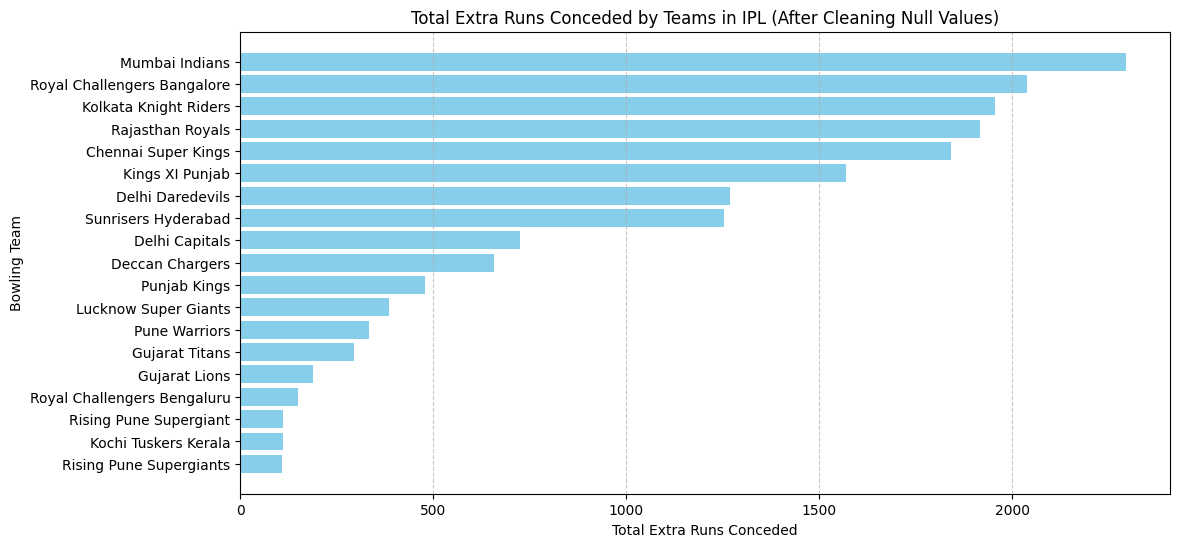

In [11]:
# Clean the null values in 'extra_runs' column before processing
df_cleaned_extras = df.dropna(subset=['extra_runs'])

# Group by bowling team and sum the extra runs
total_extra_runs_by_team = df_cleaned_extras.groupby("bowling_team")["extra_runs"].sum().reset_index()

# Sorting the data for better visualization
total_extra_runs_by_team = total_extra_runs_by_team.sort_values(by="extra_runs", ascending=False)

# Plotting the bar chart again with cleaned data
plt.figure(figsize=(12, 6))
plt.barh(total_extra_runs_by_team["bowling_team"], total_extra_runs_by_team["extra_runs"], color='skyblue')
plt.xlabel("Total Extra Runs Conceded")
plt.ylabel("Bowling Team")
plt.title("Total Extra Runs Conceded by Teams in IPL (After Cleaning Null Values)")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest on top
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


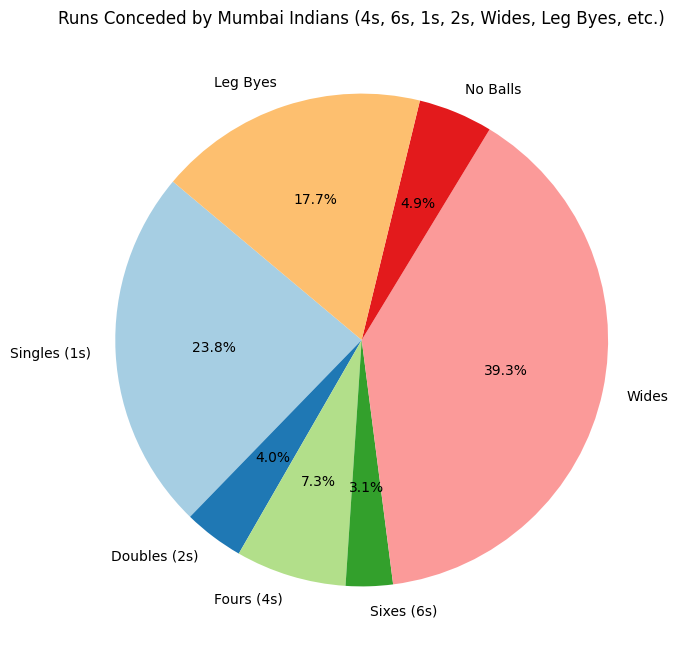

In [12]:
mi_data = df[df["bowling_team"] == "Mumbai Indians"]

# Count runs conceded by different types
run_types = {
    "Singles (1s)": (mi_data["batsman_runs"] == 1).sum(),
    "Doubles (2s)": (mi_data["batsman_runs"] == 2).sum(),
    "Fours (4s)": (mi_data["batsman_runs"] == 4).sum(),
    "Sixes (6s)": (mi_data["batsman_runs"] == 6).sum(),
    "Wides": (mi_data["extras_type"] == "wides").sum(),
    "No Balls": (mi_data["extras_type"] == "noballs").sum(),
    "Leg Byes": (mi_data["extras_type"] == "legbyes").sum(),
}

# Remove zero values
run_types = {k: v for k, v in run_types.items() if v > 0}

# Extract labels and values
labels = list(run_types.keys())
sizes = list(run_types.values())

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Runs Conceded by Mumbai Indians (4s, 6s, 1s, 2s, Wides, Leg Byes, etc.)")

# Show the pie chart
plt.show()

In [15]:
highest_scorers = df.groupby(['batting_team', 'batter'])['batsman_runs'].sum().reset_index()
highest_scorers = highest_scorers.loc[highest_scorers.groupby('batting_team')['batsman_runs'].idxmax()]


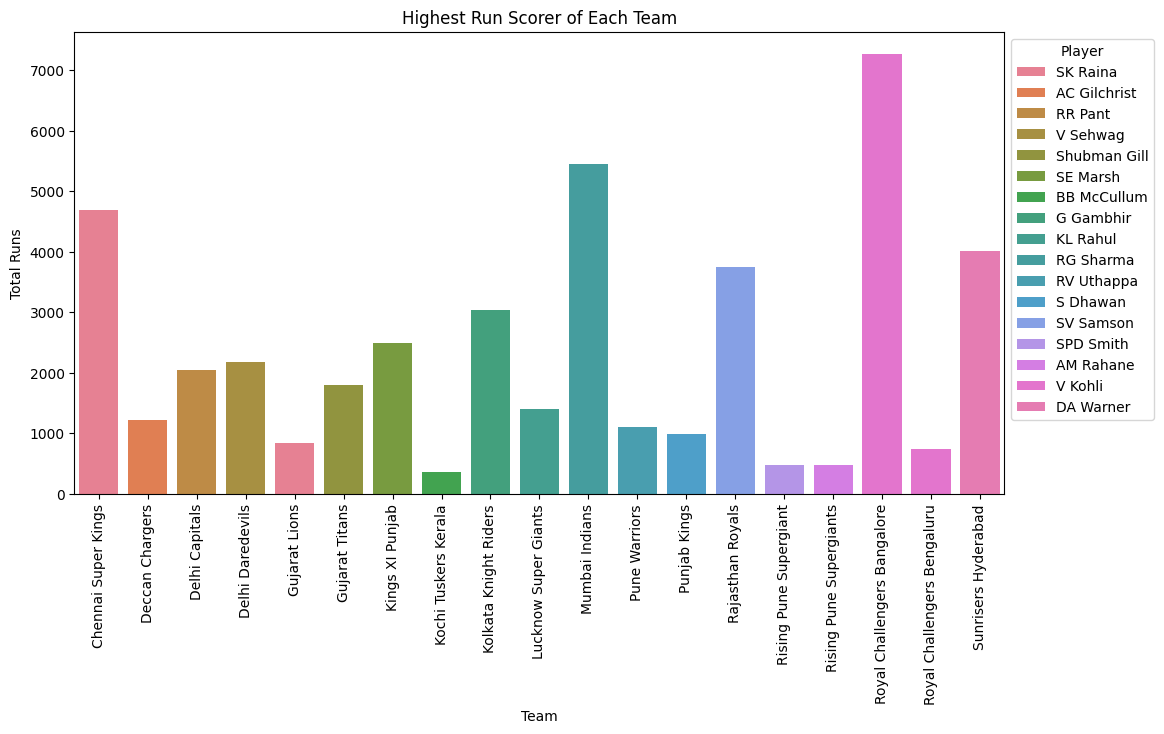

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_scorers, x='batting_team', y='batsman_runs', hue='batter', dodge=False)
plt.xticks(rotation=90)
plt.title("Highest Run Scorer of Each Team")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.legend(title="Player", bbox_to_anchor=(1, 1))
plt.show()


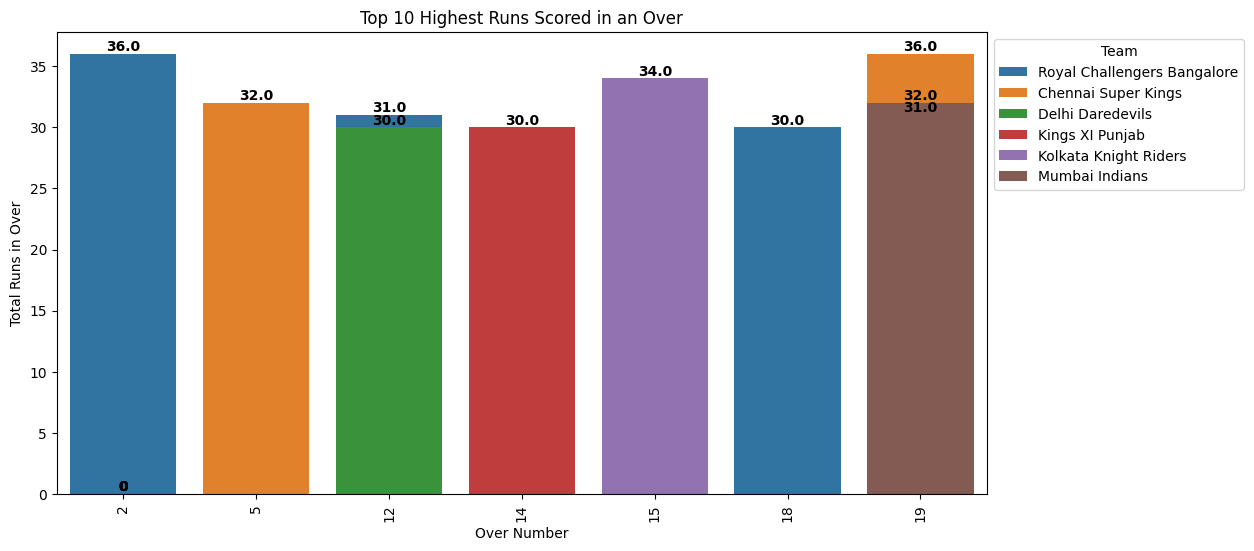

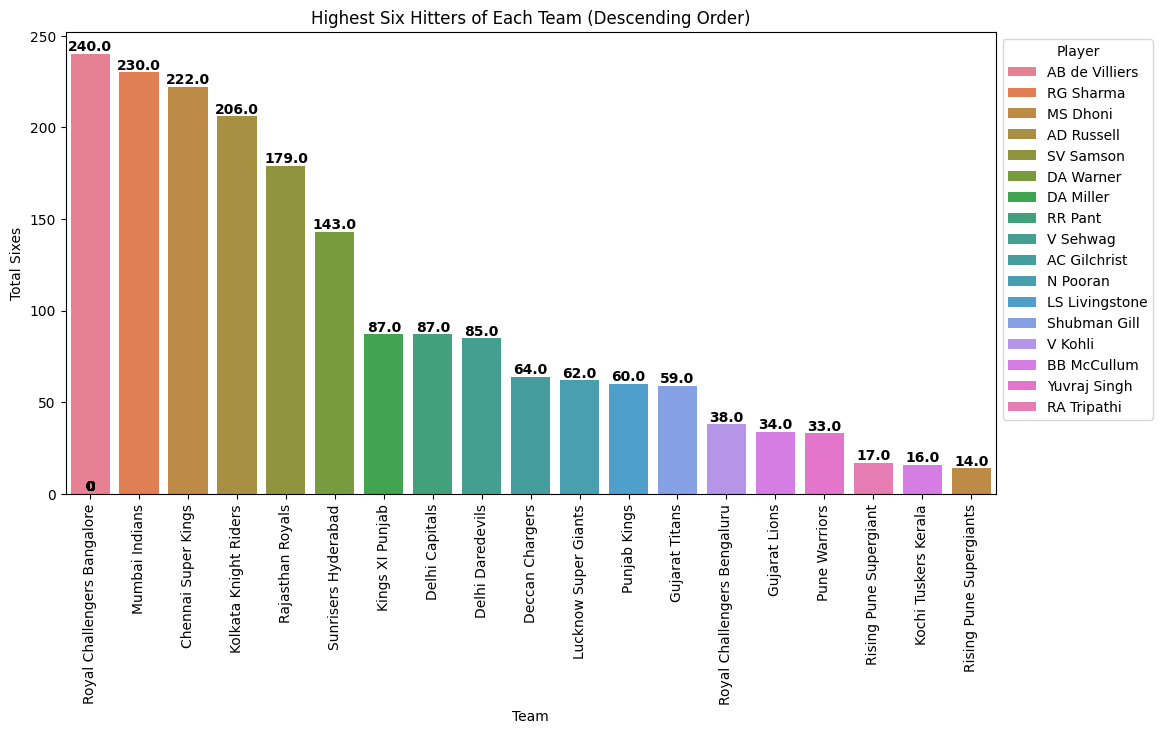

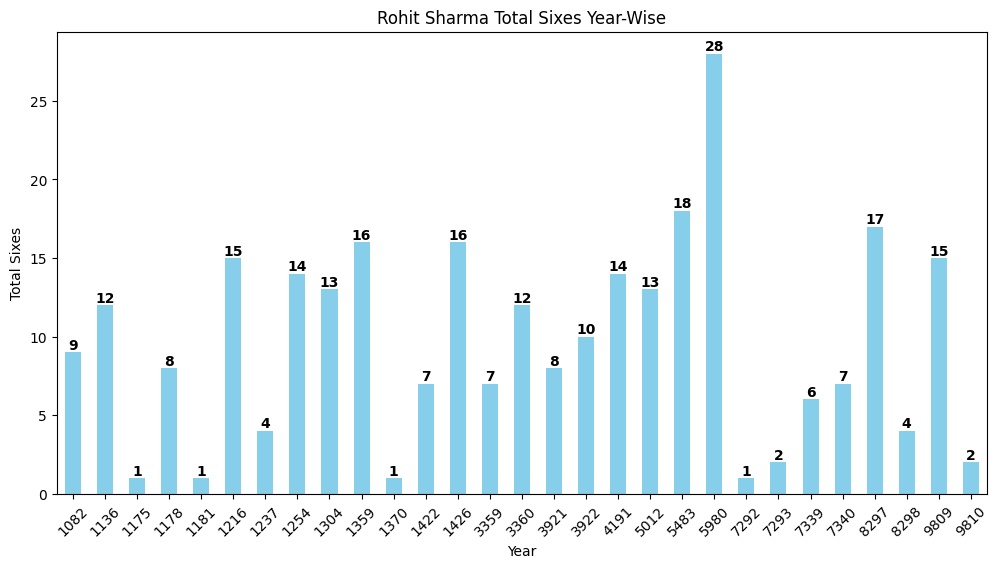

In [26]:
# 1. Top 10 highest runs scored in an over
runs_per_over = df.groupby(['match_id', 'inning', 'batting_team', 'over'])['batsman_runs'].sum().reset_index()
top_10_overs = runs_per_over.nlargest(10, 'batsman_runs')

# 2. Highest six hitters of each team
sixes = df[df['batsman_runs'] == 6].groupby(['batting_team', 'batter']).size().reset_index(name='sixes')
top_six_hitters = sixes.loc[sixes.groupby('batting_team')['sixes'].idxmax()]

# Sorting the highest six hitters in descending order
top_six_hitters = top_six_hitters.sort_values(by='sixes', ascending=False)

# 3. Rohit Sharma total sixes year-wise
df['year'] = df['match_id'].astype(str).str[:4]  # Assuming match_id contains year in the first 4 digits
rohit_sixes = df[(df['batter'] == 'RG Sharma') & (df['batsman_runs'] == 6)].groupby('year').size()

# Visualization of the top 10 highest runs scored in an over with values displayed
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10_overs, x='over', y='batsman_runs', hue='batting_team', dodge=False)
plt.xticks(rotation=90)
plt.title("Top 10 Highest Runs Scored in an Over")
plt.xlabel("Over Number")
plt.ylabel("Total Runs in Over")
plt.legend(title="Team", bbox_to_anchor=(1, 1))

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# Visualization of the highest six hitters of each team with values displayed
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_six_hitters, x='batting_team', y='sixes', hue='batter', dodge=False, order=top_six_hitters['batting_team'])
plt.xticks(rotation=90)
plt.title("Highest Six Hitters of Each Team (Descending Order)")
plt.xlabel("Team")
plt.ylabel("Total Sixes")
plt.legend(title="Player", bbox_to_anchor=(1, 1))

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# Visualization of Rohit Sharma's sixes year-wise with values displayed
plt.figure(figsize=(12, 6))
ax = rohit_sixes.plot(kind='bar', color='skyblue')
plt.title("Rohit Sharma Total Sixes Year-Wise")
plt.xlabel("Year")
plt.ylabel("Total Sixes")
plt.xticks(rotation=45)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


<ipython-input-18-682e4ba65e8f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_fours_hitters, x='batter', y='fours', palette='viridis')


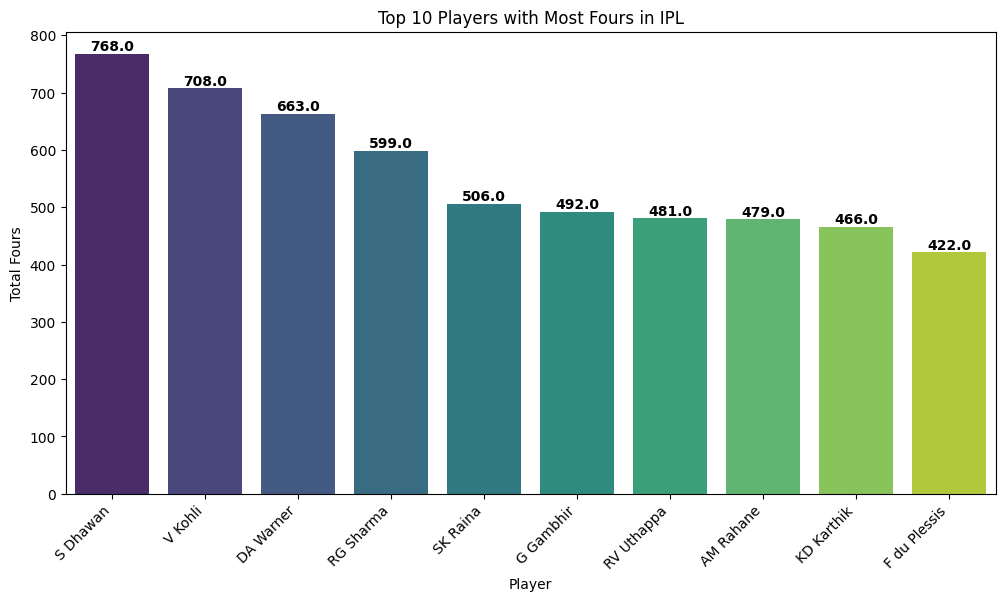

In [18]:
# 6. Most fours hit by players
fours = df[df['batsman_runs'] == 4].groupby('batter').size().reset_index(name='fours')
top_fours_hitters = fours.sort_values(by='fours', ascending=False).head(10)

# Visualization of top 10 players with most fours
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_fours_hitters, x='batter', y='fours', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Players with Most Fours in IPL")
plt.xlabel("Player")
plt.ylabel("Total Fours")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

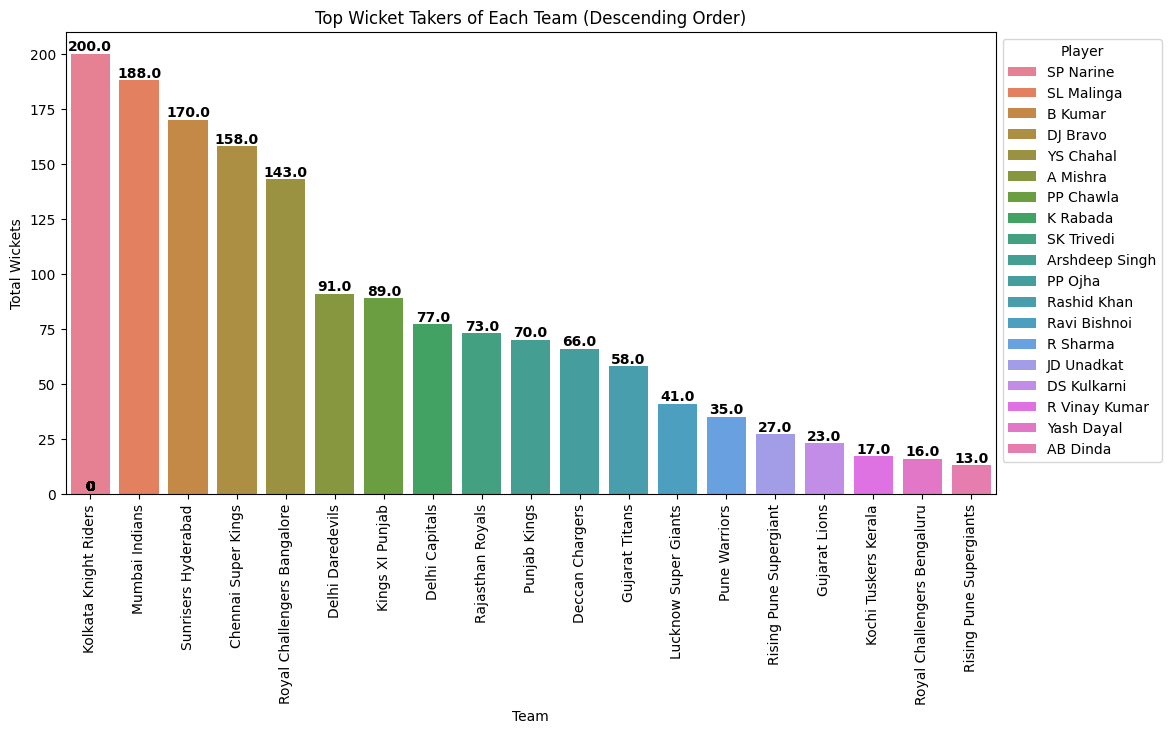

In [23]:
# Filtering out only wicket-taking deliveries using 'is_wicket' column
wicket_deliveries = df[df['is_wicket'] == 1]

# Counting wickets taken by each bowler for each team
wicket_takers = wicket_deliveries.groupby(['bowling_team', 'bowler']).size().reset_index(name='wickets')

# Getting the top wicket-taker for each team
top_wicket_takers = wicket_takers.loc[wicket_takers.groupby('bowling_team')['wickets'].idxmax()]

# Sorting data in descending order of wickets
top_wicket_takers = top_wicket_takers.sort_values(by='wickets', ascending=False)

# Visualization of top wicket takers of each team
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_wicket_takers, x='bowling_team', y='wickets', hue='bowler', dodge=False, order=top_wicket_takers['bowling_team'])
plt.xticks(rotation=90)
plt.title("Top Wicket Takers of Each Team (Descending Order)")
plt.xlabel("Team")
plt.ylabel("Total Wickets")
plt.legend(title="Player", bbox_to_anchor=(1, 1))

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


<ipython-input-29-1313e1e7ea04>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bumrah_wickets_final['year'] = bumrah_wickets_final['match_id'].astype(str).str[:4]


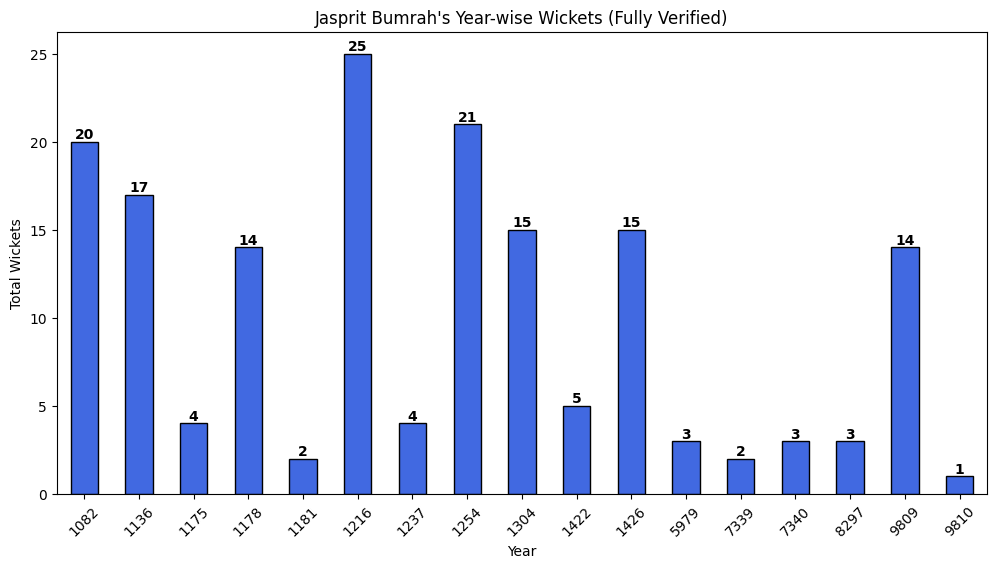

168

In [29]:
# Cleaning null values and duplicates
df_cleaned = df.dropna(subset=['player_dismissed']).drop_duplicates()

# Filtering only Jasprit Bumrah's wickets
bumrah_wickets = df_cleaned[(df_cleaned['bowler'] == 'JJ Bumrah') & (df_cleaned['is_wicket'] == 1)]

# Keeping only valid dismissal types
valid_dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'hit wicket', 'caught and bowled']
bumrah_wickets_final = bumrah_wickets[bumrah_wickets['dismissal_kind'].isin(valid_dismissals)]

# Extracting the year from the match ID (assuming match_id starts with the year)
bumrah_wickets_final['year'] = bumrah_wickets_final['match_id'].astype(str).str[:4]

# Counting year-wise wickets
bumrah_wickets_yearly = bumrah_wickets_final.groupby('year').size()

# Plot the graph
plt.figure(figsize=(12, 6))
ax = bumrah_wickets_yearly.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title("Jasprit Bumrah's Year-wise Wickets (Fully Verified)")
plt.xlabel("Year")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# Display final wicket count
bumrah_wickets_final.shape[0]
